# Ads Click Through Rate Prediction



> Ads Click Through Rate is the ratio of how many users clicked on your ad to how many users viewed your ad,

> For example, 5 out of 100 users click on the ad while watching a youtube video. So, in this case, the CTR of the youtube ad will be 5%.

>> Analyzing the click-through rate help companies in finding the best ad for their target audience.

In [ ]:
# @title Importing the Data manipulation and visualization libraries
import numpy as np                                                                                                  #for mathematical computations
import pandas as pd                                                                                                 #for data manipulation and analysis
import matplotlib.pyplot as plt                                                                                     #for data visualization
import seaborn as sns                                                                                               #for data visualization
from google.colab import data_table
import plotly.express as px
import plotly.graph_objects as go
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline

In [ ]:
# @title Importing the libraries for model_selection and Developmet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

                                                               #for train and test the data

In [ ]:
# @title Importing the metrics libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score



In [ ]:
pip install optuna

In [ ]:
# @title importing the production libraries
from sklearn.pipeline import Pipeline
import pickle
import optuna


In [ ]:
# @title Acquring the data using pandas (.csv format)
data=pd.read_csv('/content/ctr_ratio (1).csv')
data_table.DataTable(data.sample(15))

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
3830,82.07,48,43974.49,157.04,Polarized tangible collaboration,Burgessside,Female,Bangladesh,17-07-2016 01:13,1
235,76.81,28,71222.40,217.37,Reverse-engineered background Graphic Interface,West Joseph,Female,Australia,04-05-2016 12:06,1
8562,43.84,40,40468.53,140.46,Multi-tiered stable leverage,Youngfort,Female,Faroe Islands,05-01-2016 11:53,0
821,85.84,27,39193.45,131.29,Total even-keeled architecture,East Maureen,Male,Dominican Republic,23-03-2016 21:06,0
4720,81.58,30,33293.78,228.81,Total 5thgeneration standardization,New Travistown,Female,Lebanon,08-07-2016 17:14,1
3141,55.60,35,42993.48,221.18,Total cohesive moratorium,Williamsport,Male,Myanmar,18-03-2016 13:22,0
2464,68.88,42,60514.05,238.58,Innovative interactive portal,Hubbardmouth,Female,Czech Republic,06-04-2016 11:24,1
3399,60.72,23,61617.98,211.38,Centralized logistical secured line,Hollandberg,Male,United States Virgin Islands,21-07-2016 10:01,0
1106,35.61,37,75180.20,108.10,Vision-oriented attitude-oriented Internet sol...,Shawstad,Female,French Southern Territories,10-02-2016 19:20,1
4806,55.60,35,25603.93,236.87,Robust uniform framework,Wrightburgh,Female,Thailand,11-06-2016 06:47,0


In [ ]:
# @title Information about the data
info_dict = {
    "Column Name": data.columns,
    "Non-Null Count": data.notnull().sum().values,
    "Dtype": data.dtypes.values
}

# Convert to DataFrame
df_info = pd.DataFrame(info_dict)

# Display using data_table
data_table.DataTable(df_info)


,Column Name,Non-Null Count,Dtype
0,Daily Time Spent on Site,10000,float64
1,Age,10000,int64
2,Area Income,10000,float64
3,Daily Internet Usage,10000,float64
4,Ad Topic Line,10000,object
5,City,10000,object
6,Gender,10000,object
7,Country,10000,object
8,Timestamp,10000,object
9,Clicked on Ad,10000,int64


In [ ]:
# @title Shape of the data
data_shape = pd.DataFrame({"Rows": [data.shape[0]], "Columns": [data.shape[1]]})

# Display using data_table
data_table.DataTable(data_shape)

,Rows,Columns
0,10000,10


In [ ]:
# @title Discription about the data
k=data.describe()
data_table.DataTable(k)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [ ]:
# @title Analysing the data with integer data type
import math

data_int = []
for i in data.columns:
    if data[i].dtype == 'int64' or data[i].dtype == 'float64':
        data_int.append(i)  # Fixed typo




#   Answering some question to gain insights from the data and converting into integer
1. What is the relationship between Daily Time Spent on Site and the likelihood of clicking on an ad?
2. How does Age affect the probability of clicking on an ad?
3. Is there a correlation between Daily Internet Usage and Ad Clicks?
4. Do users with higher Area Income spend more time on the site?
5. Which age group has the highest engagement with ads?
6. Does Gender play a role in ad engagement?
7. Are there certain Countries where users are more likely to click on ads?
8. Does the City influence Daily Time Spent on Site or Ad Clicks?
9. Is there a specific time of the day (based on Timestamp) when users click on ads the most?
10. Do users with higher Daily Internet Usage interact more with ads?
11. At which time has more user engagement ?





In [ ]:
# @title 1. What is the relationship between Daily Time Spent on Site and the likelihood of clicking on an ad?
df = px.data.tips()

fig = px.histogram(data, x="Daily Time Spent on Site", color='Clicked on Ad', nbins=50)

fig.show()

In [ ]:
# @title How does Age affect the probability of clicking on an ad?
df = px.data.tips()

fig = px.histogram(data, x="Age", color='Clicked on Ad', nbins=50)

fig.show()

In [ ]:
# @title Does Gender play a role in ad engagement?
px.pie(data, "Gender", 'Clicked on Ad',title='Gender based engagement')


In [ ]:
# @title Best time for user engagement
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%d-%m-%Y %H:%M")
data["Time"] = data["Timestamp"].dt.hour
px.histogram(data, x="Time", color='Clicked on Ad',nbins=24,histnorm='probability')

In [ ]:
# @title User angagement vs area income
px.histogram(data, x="Area Income",y='Daily Time Spent on Site', color='Clicked on Ad',nbins=10)


# Data preprocessing

In [ ]:
data.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Time
8412,68.10,40,54286.10,167.22,Inverse local hub,South Walter,Female,Greece,2016-05-23 08:06:00,0,8
4303,72.07,36,32549.95,133.90,Team-oriented zero-defect initiative,Edwardsport,Male,Hong Kong,2016-07-08 03:47:00,0,3
8603,55.60,35,25603.93,236.87,User-centric composite contingency,Wrightburgh,Female,Myanmar,2016-07-18 01:36:00,0,1
3953,78.51,40,73882.91,132.63,Synergized coherent interface,Phelpschester,Male,Chad,2016-03-31 20:55:00,0,20
3328,38.37,36,59240.24,124.44,Intuitive exuding service-desk,Garciatown,Female,Niger,2016-02-26 19:48:00,0,19


In [ ]:
# @title Checking for null values
print(data.isnull().sum())
print('There are no missing values in the data')

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
Time                        0
dtype: int64
There are no missing values in the data


# Observing the Outliers and distribution of the *data*

In [ ]:
for i in data_int[:-1]:
    fig = px.box(data, x=i)
    fig.show()

 We came to know that only a column with income has an ouliers

In [ ]:
x=data.drop(['Clicked on Ad','Timestamp','Ad Topic Line','City','Country'],axis=1)
y=data['Clicked on Ad']

# converting catrgorical varibale to numerical variable

In [ ]:
float_columns = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage"]  # Replace with actual column names

# Apply math.ceil() and convert to integer
x[float_columns] = x[float_columns].apply(lambda col: col.apply(math.ceil)).astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
"""def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_loguniform('C', 1e-4, 10)  # Regularization strength
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])  # Regularization type
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])  # Compatible solvers

    # Ensure solver compatibility with penalty
    if penalty == 'l1' and solver == 'saga':
        return float('inf')  # Skip invalid combinations

    # Train Logistic Regression model
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=200)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # Optuna maximizes accuracy

# Run Optuna optimization
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials

# Print best parameters
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)"""

'def objective(trial):\n    # Suggest hyperparameters\n    C = trial.suggest_loguniform(\'C\', 1e-4, 10)  # Regularization strength\n    penalty = trial.suggest_categorical(\'penalty\', [\'l1\', \'l2\'])  # Regularization type\n    solver = trial.suggest_categorical(\'solver\', [\'liblinear\', \'saga\'])  # Compatible solvers\n\n    # Ensure solver compatibility with penalty\n    if penalty == \'l1\' and solver == \'saga\':\n        return float(\'inf\')  # Skip invalid combinations\n\n    # Train Logistic Regression model\n    model = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42, max_iter=200)\n    model.fit(X_train, y_train)\n\n    # Predict on test set\n    y_pred = model.predict(X_test)\n\n    # Evaluate accuracy\n    accuracy = accuracy_score(y_test, y_pred)\n\n    return accuracy  # Optuna maximizes accuracy\n\n# Run Optuna optimization\nstudy = optuna.create_study(direction=\'maximize\')  # Maximize accuracy\nstudy.optimize(objective, n_trials=50)  # R

In [ ]:
best_params = {'C': 0.15637213877792133, 'penalty': 'l2', 'solver': 'saga'}

lr_model = LogisticRegression(C=best_params['C'],
                              penalty=best_params['penalty'],
                              solver=best_params['solver'],
                              random_state=42,
                              max_iter=200)

In [ ]:
"""def objective(trial):
    # Define hyperparameters
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Create model
    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    return np.mean(scores)  # Return average accuracy

# Run Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials

# Best parameters
print("Best parameters:", study.best_params)

# Train model with best parameters
best_params = study.best_params
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate model
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)"""

'def objective(trial):\n    # Define hyperparameters\n    criterion = trial.suggest_categorical(\'criterion\', [\'gini\', \'entropy\', \'log_loss\'])\n    splitter = trial.suggest_categorical(\'splitter\', [\'best\', \'random\'])\n    max_depth = trial.suggest_int(\'max_depth\', 2, 20)\n    min_samples_split = trial.suggest_int(\'min_samples_split\', 2, 20)\n    min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 1, 20)\n\n    # Create model\n    model = DecisionTreeClassifier(\n        criterion=criterion,\n        splitter=splitter,\n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        random_state=42\n    )\n\n    # Perform cross-validation\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'accuracy\')\n\n    return np.mean(scores)  # Return average accuracy\n\n# Run Optuna study\nstudy = optuna.create_study(direction=\'maximize\')  # We want to maximize accuracy\nstudy.optimize(obj

In [ ]:
"""def objective(trial):
    # Define hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Create model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    return np.mean(scores)  # Return average accuracy

# Run Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=50)  # Run 50 trials

# Best parameters
print("Best parameters:", study.best_params)"""

'def objective(trial):\n    # Define hyperparameters\n    n_estimators = trial.suggest_int(\'n_estimators\', 50, 300, step=50)\n    max_depth = trial.suggest_int(\'max_depth\', 5, 30)\n    min_samples_split = trial.suggest_int(\'min_samples_split\', 2, 20)\n    min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 1, 20)\n    max_features = trial.suggest_categorical(\'max_features\', [\'sqrt\', \'log2\', None])\n\n    # Create model\n    model = RandomForestClassifier(\n        n_estimators=n_estimators,\n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        max_features=max_features,\n        random_state=42\n    )\n\n    # Perform cross-validation\n    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=\'accuracy\')\n\n    return np.mean(scores)  # Return average accuracy\n\n# Run Optuna study\nstudy = optuna.create_study(direction=\'maximize\')  # We want to maximize accuracy\nstudy.optimize(

In [ ]:
best_params_rf = {
    'n_estimators': 100,
    'max_depth': 24,
    'min_samples_split': 9,
    'min_samples_leaf': 2,
    'max_features': None
}


In [ ]:
Rf=RandomForestClassifier(**best_params_rf)

In [ ]:
model_data = {
    "Model Name": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Best Parameters": [
        {'C': 0.15637213877792133, 'penalty': 'l2', 'solver': 'saga'},
        {'criterion': 'log_loss', 'splitter': 'best', 'max_depth': 19, 'min_samples_split': 20, 'min_samples_leaf': 12},
        {'n_estimators': 100, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}
    ],
    "Accuracy (%)": [69.5, 77.05, 80.55]
}

# Convert to DataFrame
df_models = pd.DataFrame(model_data)

# Display using data_table
data_table.DataTable(df_models)

,Model Name,Best Parameters,Accuracy (%)
0,Logistic Regression,"{'C': 0.15637213877792133, 'penalty': 'l2', 's...",69.50
1,Decision Tree,"{'criterion': 'log_loss', 'splitter': 'best', ...",77.05
2,Random Forest,"{'n_estimators': 100, 'max_depth': 24, 'min_sa...",80.55


In [ ]:
#coulumn trans---> pipeline create--->>>> pickle file ---->> api ----> deployement

In [ ]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Time
9254,75,31,59678,208,Male,11
1561,73,29,73911,196,Male,16
1670,43,40,39724,166,Female,21
6087,67,49,45633,125,Female,0
6669,45,36,50629,169,Male,8
...,...,...,...,...,...,...
5734,83,41,57847,127,Female,14
5191,89,36,50629,127,Male,14
5390,79,35,25604,237,Female,7
860,60,30,57878,139,Male,13


In [ ]:
X_train['Gender'] = X_train['Gender'].replace({'Male': 0, 'Female': 1})
X_test['Gender'] = X_test['Gender'].replace({'Male': 0, 'Female': 1})

<ipython-input-213-eb6796fc2a71>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-213-eb6796fc2a71>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Time
9254,75,31,59678,208,0,11
1561,73,29,73911,196,0,16
1670,43,40,39724,166,1,21
6087,67,49,45633,125,1,0
6669,45,36,50629,169,0,8
...,...,...,...,...,...,...
5734,83,41,57847,127,1,14
5191,89,36,50629,127,0,14
5390,79,35,25604,237,1,7
860,60,30,57878,139,0,13


In [ ]:
num_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Time','Gender']



In [ ]:
preprocessor = ColumnTransformer([
    ('scale_features', StandardScaler(),num_features),
])

In [ ]:
pipeline=make_pipeline(preprocessor,Rf)

In [ ]:

pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage',
                                                   'Time', 'Gender'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=24, max_features=None,
                                        min_samples_leaf=2,
                                        min_samples_split=9))])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scale_features',
                                                  StandardScaler(),
                                                  ['Daily Time Spent on Site',
                                                   'Age', 'Area Income',
                                                   'Daily Internet Usage',
                                                   'Time', 'Gender'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=24, max_features=None,
                                        min_samples_leaf=2,
                                        min_samples_split=9))])

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Time
6252,56,39,42994,116,0,3
4684,81,41,59244,113,1,17
1731,62,45,70054,175,1,12
4742,60,28,53059,141,1,20
4521,87,32,55425,179,0,3
...,...,...,...,...,...,...
6412,73,36,73883,165,0,8
8285,52,36,76004,141,1,7
7853,45,27,74904,185,0,3
1095,81,49,39032,196,0,20


In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
accuracy_score(y_test,y_pred)

0.804

In [ ]:
pickle.dump(pipeline,open('pipe.sav','wb'))

In [ ]:
pip install shap


In [ ]:
import shap

In [ ]:
# Initialize SHAP explainer
explainer = shap.Explainer(pipeline.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)


ExactExplainer explainer: 2001it [02:55, 10.62it/s]                          


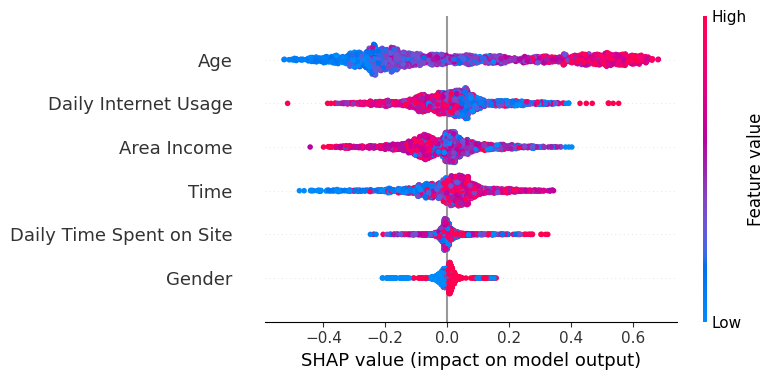

In [ ]:
shap.summary_plot(shap_values, X_test)


<Figure size 640x480 with 0 Axes>

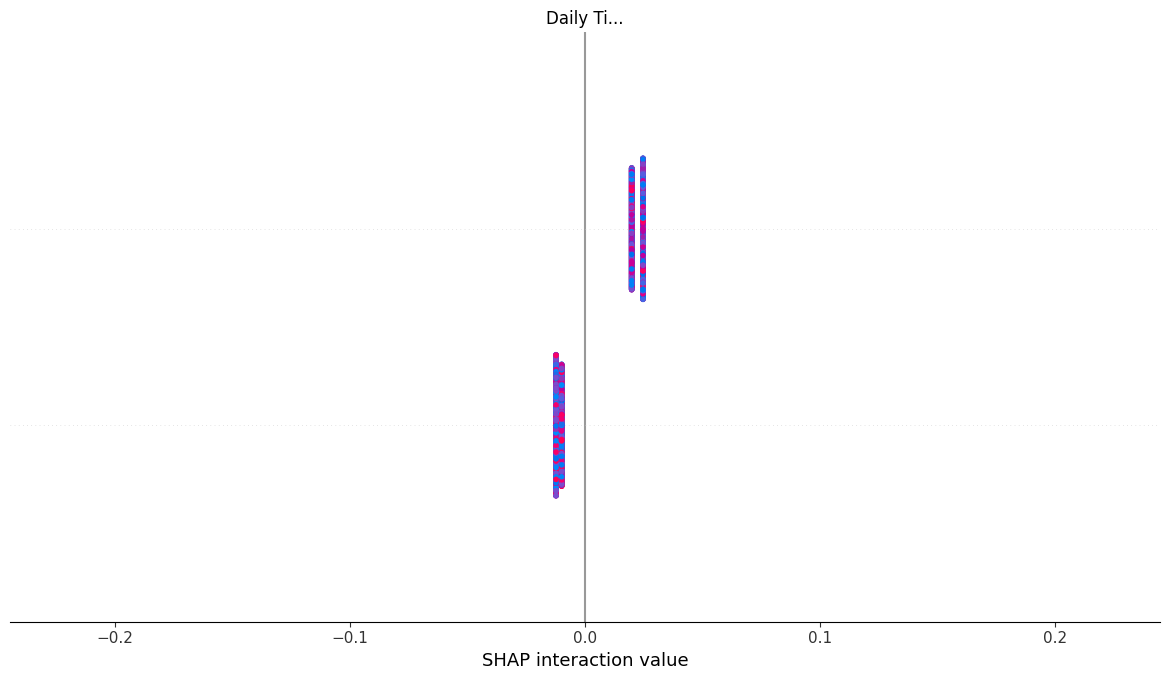

In [ ]:
explainer = shap.TreeExplainer(Rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
